## Helper Functions For MAP Calculation

In [0]:
from scipy.spatial.distance import cdist
def eval_MAP_K(query_set, search_set, query_label, search_set_label, K):
    query_class_arr = query_set
    search_set_class_arr = search_set
    query_label_arr = query_label
    query_label_arr.astype(int)
    search_set_label_arr = search_set_label
    search_set_label_arr.astype(int)
    num_query_sample = query_label_arr.shape[0]
    dist_q_search_class = cdist(query_class_arr,search_set_class_arr,metric='euclidean')
    AP=0
    pre=0
    for query_count in range(0,num_query_sample):
      actual_label = query_label_arr[query_count]
      value=dist_q_search_class[query_count,:]
      sorted_value_idx=value.argsort()
      predicted_K_label = search_set_label_arr[sorted_value_idx[0:K]]
      L=np.sum((np.in1d(predicted_K_label,actual_label)).astype(int))
      P=0
      for r in range(0,K):
        rtr_label_r = predicted_K_label[:(r+1)]
        l=np.sum((np.in1d(rtr_label_r,actual_label)).astype(int))
        precision=l/(r+1)
        if actual_label==predicted_K_label[r]:
          delta=1
        else:
          delta=0
        P=P+(precision*delta)
      if L!=0:
        AP=AP+((1/L)*P)
    map_K=AP/num_query_sample
    return map_K,AP

In [0]:
def get_skt_data():
  training_files_='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
  labels_=os.listdir(training_files_)
  training_query_skt=[]
  training_query_label=[]
  #z=0
  for label in labels_:
    skt_names=os.listdir(os.path.join(training_files_,label))
    for skt in skt_names:
      skt_fea_path=os.path.join(training_files_,label,skt)
      skt_fea=np.load(skt_fea_path)
      skt_fea = img_fea.reshape(4096,1).T
      #x_train.append(img_fea)
      training_query_skt.append(Encoder_model_sktch.predict(skt_fea))
      training_query_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
    #z=z+1



  testing_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Testing'
  labels=os.listdir(testing_files)
  testing_query_skt=[]
  testing_query_label=[]
  #z=0
  for label in labels:
    skt_names=os.listdir(os.path.join(testing_files,label))
    for skt in skt_names:
      skt_fea_path=os.path.join(testing_files,label,skt)
      skt_fea=np.load(skt_fea_path)
      skt_fea = skt_fea.reshape(4096,1).T
      #x_train.append(img_fea)
      testing_query_skt.append(Encoder_model_sktch.predict(skt_fea))
      testing_query_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
    #z=z+1
    return np.squeeze(np.asarray(training_query_skt)),np.asarray(training_query_label),np.squeeze(np.asarray(testing_query_skt)),np.asarray(testing_query_label)

In [0]:
def get_image_data():
  training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
  labels=os.listdir(training_files)
  training_search_img=[]
  training_search_img_label=[]
  z=0
  for label in labels:
    img_names=os.listdir(os.path.join(training_files,label))
    for img in img_names:
      img_fea_path=os.path.join(training_files,label,img)
      img_fea=np.load(img_fea_path)
      img_fea = img_fea.reshape(4096,1).T
      #x_train.append(img_fea)
      training_search_img.append(Encoder_model_image.predict(img_fea))
      training_search_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
    z=z+1



  testing_files_='/content/gdrive/My Drive/Feature_Vectors/Image/Testing'
  labels=os.listdir(testing_files_)
  testing_search_img=[]
  testing_search_img_label=[]
  z=0
  for label in labels:
    img_names=os.listdir(os.path.join(testing_files_,label))
    for img in img_names:
      img_fea_path=os.path.join(testing_files_,label,img)
      img_fea=np.load(img_fea_path)
      img_fea = img_fea.reshape(4096,1).T
      #x_train.append(img_fea)
      testing_search_img.append(Encoder_model_image.predict(img_fea))
      testing_search_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
    z=z+1
    return np.squeeze(np.asarray(training_search_img)),np.asarray(training_search_img_label),np.squeeze(np.asarray(testing_search_img)),np.asarray(testing_search_img_label)

## **Function to calculate MAP**

In [0]:
def calc():
  training_query_skt,training_query_label,testing_query_skt,testing_query_label=get_skt_data()
  training_search_img,training_search_img_label,testing_search_img,testing_search_img_label=get_image_data()
  return eval_MAP_K(training_query_skt,training_search_img,training_query_label,training_search_img_label,100)

In [0]:
def Convert(dicts,dictionary):
  for a,b in dicts:
    dictionary.setdefault(a,[]).append(b)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Sketch Input**

In [0]:
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels=os.listdir(training_files)
dicts=list(enumerate(labels))
Convert(dicts,dictionary)
x_train_skt=[]
y_train=[]
for label in labels:
  skt_fea_names=os.listdir(os.path.join(training_files,label))
  #label_list
  for skt in skt_fea_names:
    skt_fea_path=os.path.join(training_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_train_skt.append(skt_fea)
    #y_train.append(label+'-'+img)
x_train_skt=np.asarray(x_train_skt)

In [0]:
val_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Validation'
labels=os.listdir(val_files)
x_val_skt=[]
y_val=[]
for label in labels:
  skt_names=os.listdir(os.path.join(val_files,label))
  for skt in skt_names:
    skt_fea_path=os.path.join(val_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_val_skt.append(skt_fea)
    #y_val.append(label+'-'+img)
x_val_skt=np.asarray(x_val_skt)

## **Image Inputs**

In [0]:
img_training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labels=os.listdir(img_training_files)
x_train_img=[]
y_train_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(img_training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(img_training_files,label,img)
    img_fea=np.load(img_fea_path)
    x_train_img.append(img_fea)
x_train_img=np.asarray(x_train_img)

In [0]:
val_files_img='/content/gdrive/My Drive/Feature_Vectors/Image/Validation'
labels=os.listdir(val_files_img)
x_val_img=[]
y_val_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(val_files,label))
  for img in img_names:
    img_fea_path=os.path.join(val_files,label,img)
    img_fea=np.load(img_fea_path)
    x_val_img.append(img_fea)
    #y_val_img.append(label+'-'+img)
x_val_img=np.asarray(x_val_img)

In [11]:
x_train_img.shape
#x_train_img.dtype

(5888, 4096)

In [12]:
x_val_img.shape

(736, 4096)

In [13]:
x_train_skt.shape

(5888, 4096)

In [14]:
x_val_skt.shape

(736, 4096)

## **Creating the models**

In [0]:
from tensorflow.python.keras.layers import Dense,Input
from tensorflow.python.keras.models import Model

In [16]:
input_vec=Input(shape=(4096,))
encoder_layer1=Dense(1024,activation='relu')(input_vec)
encoder_layer2=Dense(256,activation='relu')(encoder_layer1)
encoded_vec=Dense(200,activation='relu')(encoder_layer2)

decoder_layer1=Dense(256,activation='relu')(encoded_vec)
decoder_layer2=Dense(1024,activation='relu')(decoder_layer1)
output=Dense(4096,activation='relu')(decoder_layer2)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
autoencoder_sktch=Model(input_vec,output)
Encoder_model_sktch=Model(input_vec,encoded_vec)

In [0]:
input_vec_=Input(shape=(4096,))
encoder_layer1_=Dense(1024,activation='relu')(input_vec_)
encoder_layer2_=Dense(256,activation='relu')(encoder_layer1_)
encoded_vec_=Dense(200,activation='relu')(encoder_layer2_)

decoder_layer1_=Dense(256,activation='relu')(encoded_vec_)
decoder_layer2_=Dense(1024,activation='relu')(decoder_layer1_)
output_=Dense(4096,activation='relu')(decoder_layer2_)

In [0]:
autoencoder_img=Model(input_vec_,output_)
Encoder_model_image=Model(input_vec_,encoded_vec_)

In [0]:
merged=Model([input_vec,input_vec_],[output,output_])

In [21]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(merged,to_file='/content/gdrive/My Drive/demo.png',show_shapes=True)

Using TensorFlow backend.


In [22]:
from tensorflow.python.keras.optimizers import Adam#optimizer=Adam(lr=1e-5)
merged.compile(optimizer='sgd',loss='mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [0]:
from tensorflow.python import keras
class callbacker(keras.callbacks.Callback):
	def on_train_begin(self, logs={}):
		self.MAP = []
		#self.losses = []

	def on_train_end(self, logs={}):
		return

	def on_epoch_begin(self, epoch, logs={}):
		return

	def on_epoch_end(self, epoch, logs={}):
		#self.losses.append(logs.get('loss'))
		#y_pred = self.model.predict(self.validation_data[0])
		self.MAP.append(calc())
		return
	def on_batch_begin(self, batch, logs={}):
		return

	def on_batch_end(self, batch, logs={}):
		return

In [24]:
callbacked=callbacker()
x=merged.fit([x_train_skt,x_train_skt],[x_train_img,x_train_img],
           epochs=50,
                 batch_size=128,validation_data=([x_val_skt,x_val_skt],[x_val_img,x_val_img]),shuffle=True,callbacks=[callbacked])

Train on 5888 samples, validate on 736 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5888/5888 [==============================] - 60s 10ms/sample - loss: 4.3221 - dense_5_loss: 2.1668 - dense_11_loss: 2.1553 - val_loss: 3.1681 - val_dense_5_loss: 1.5878 - val_dense_11_loss: 1.5774
Epoch 2/50
5888/5888 [==============================] - 60s 10ms/sample - loss: 4.2716 - dense_5_loss: 2.1448 - dense_11_loss: 2.1268 - val_loss: 3.1246 - val_dense_5_loss: 1.5696 - val_dense_11_loss: 1.5564
Epoch 3/50
5888/5888 [==============================] - 60s 10ms/sample - loss: 4.2114 - dense_5_loss: 2.1163 - dense_11_loss: 2.0951 - val_loss: 3.0854 - val_dense_5_loss: 1.5483 - val_dense_11_loss: 1.5383
Epoch 4/50
5888/5888 [==============================] - 60s 10ms/sample - loss: 4.1566 - dense_5_loss: 2.0880 - dense_11_loss: 2.0687 - val_loss: 3.0580 - val_dense_5_loss: 1.5310 - val_dense_11_loss: 1.5245
Epoch 5/50
5888/5888 [==============================] - 60s 10ms/sample -

In [25]:
print(callbacked.MAP)

[(0.03262311656128396, 192.08491031283995), (0.034656712227725726, 204.0587215968491), (0.033963667092033155, 199.9780718378912), (0.03309399507558688, 194.85744300505553), (0.03805422426383702, 224.06327246547235), (0.038344482582377756, 225.77231344504023), (0.03817116469506694, 224.75181772455417), (0.038075656053036415, 224.1894628402784), (0.03649880263305487, 214.90494990342708), (0.036325474147109064, 213.88439177817818), (0.03607532259554076, 212.411499442544), (0.0355359203784573, 209.23549918835658), (0.0344863986915074, 203.05591549559557), (0.03428094232617549, 201.8461884165213), (0.03372059064332118, 198.5468377078751), (0.03371882036835571, 198.5364143288784), (0.03383334896591923, 199.21075871133243), (0.033855213804977524, 199.33949888370765), (0.03376276215806195, 198.79514358666873), (0.03429243256236724, 201.9138429272183), (0.03433589668927737, 202.16975970646513), (0.03425549682131499, 201.69636528390265), (0.03407212429056349, 200.61666782283785), (0.033992241678

In [26]:
x.history.keys()

dict_keys(['loss', 'dense_5_loss', 'dense_11_loss', 'val_loss', 'val_dense_5_loss', 'val_dense_11_loss'])

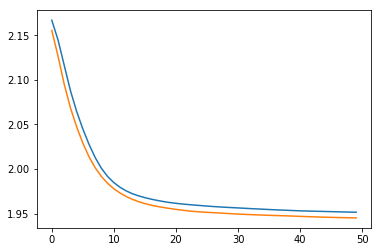

In [27]:
import matplotlib.pyplot as plt
plt.plot(x.history['dense_5_loss'])
plt.plot(x.history['dense_11_loss'])

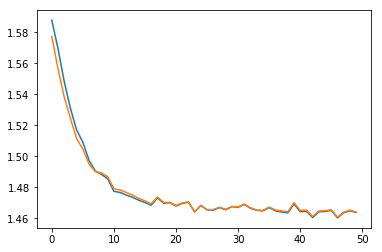

In [28]:
import matplotlib.pyplot as plt
plt.plot(x.history['val_dense_5_loss'])
plt.plot(x.history['val_dense_11_loss'])

In [0]:
#merged.get_weights()

In [0]:
#autoencoder_sktch.get_weights()

In [0]:
x=[]
for i in range(0,len(callbacked.MAP)):
  x.append(callbacked.MAP[i][0])

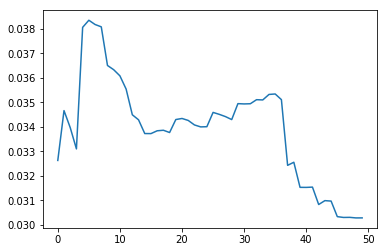

In [40]:
plt.plot(x)